## Movie Recommendation Systems
Project Proposal : I plan to use The Movies dataset from kaggle to create a recommendation engine for users

Dataset: Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. This dataset also has files containing 100,000 ratings from 700 users for a small subset of 9,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

## Loading the data

In [33]:
%matplotlib inline
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
    
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS

In [46]:
df = pd.read_csv('D:/Cinci prep/Coursework/Python/the-movies-dataset/movies_metadata.csv')
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusi...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSA...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she'...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,Father of the Bride Part II,False,5.7,173.0


In [35]:
print("The dataset has {} rows and {}columns".format(df.shape[0],df.shape[1]))

The dataset has 45466 rows and 24columns


In [4]:
#add object type to table

| Column Name | Description |
| :- | :- |
| adult | Indicates if the movie is X-Rated or Adult. |
| belongs_to_collection | Information on the movie series the particular film belongs to |
| budget | The budget of the movie in dollars. |
|genres: | genres associated with the movie |
| homepage | The Official Homepage of the move |
|id |: The ID of the move. |
| imdb_id |  The IMDB ID of the movie. |
| original_language |  The language in which the movie was originally shot in. |
| original_title |  The original title of the movie. |
| overview |  A brief blurb of the movie. |
| popularity |  The Popularity Score assigned by TMDB. |
| poster_path |  The URL of the poster image. |
| production_companies |  List of Production companies involved in making of the movie |
| production_countries |  List of countries where the movie was shot/produced in. |
| release_date |  Theatrical Release Date of the movie. |
| revenue |  The total revenue of the movie in dollars. |
| runtime |  The runtime of the movie in minutes. |
| spoken_languages |  A stringified list of spoken languages in the film. |
| status |  The status of the movie (Released, To Be Released, Announced, etc.) |
| tagline |  The tagline of the movie. |
| title | The Official Title of the movie. |
| video | Indicates if there is a video present of the movie with TMDB. |
| vote_average | The average rating of the movie. |
| vote_count | The number of votes by users, as counted by TMDB. |

# DATA WRANGLING

## Meta_movies dataset

In [36]:
def missing_values(df):
    total_na = df.isnull().sum()
    percent = round((df.isnull().sum()/df.isnull().count()*100),2)
    output =  pd.concat([total_na, percent], axis=1, keys=['Total', 'Percent (%)'])
    return output[output['Percent (%)']>0].sort_values(by = ['Percent (%)'],ascending = False)

missing_values(df)

,Total,Percent (%)
belongs_to_collection,40972,90.12
homepage,37684,82.88
tagline,25054,55.10
overview,954,2.10
poster_path,386,0.85
runtime,263,0.58
status,87,0.19
release_date,87,0.19
imdb_id,17,0.04
original_language,11,0.02


In [6]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [7]:
df[(df['title'].isna())==True]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df = df[df['title'].notna()]

In [38]:
df[df['original_title'] != df['title']][['title', 'original_title']].shape

(11396, 2)

In [48]:
df = df.drop('imdb_id', axis=1)
df = df.drop('original_title', axis=1)
df = df.drop('adult', axis=1)

In [49]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

In [41]:
print("The meta_movies final dataset has {} rows and {}columns".format(df.shape[0],df.shape[1]))

The meta_movies final dataset has 45460 rows and 21columns


In [50]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [56]:
df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)

In [60]:
df['Revenue (in Millions)'] = round(df['revenue'] / 1000000,2)
df['Budget (in Millions)'] = round(df['budget'] / 1000000,2)
df['Returns per $ spent'] = df['Revenue (in Millions)'] / df['Budget (in Millions)']

In [ ]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

## Credits dataset

In [19]:
credits_df = pd.read_csv('D:/Cinci prep/Coursework/Python/the-movies-dataset/credits.csv')
credits_df.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [20]:
print("The credits dataset has {} rows and {}columns".format(credits_df.shape[0],credits_df.shape[1]))

The credits dataset has 45476 rows and 3columns


In [21]:
missing_values(credits_df)

,Total,Percent (%)


# EDA

In [23]:
from IPython.display import Image, HTML

In [ ]:
#

In [66]:
#highest grossing individual movies
gross_top = df[['poster_path', 'title','year', 'Budget (in Millions)', 'Revenue (in Millions)','Returns per $ spent']].sort_values('Revenue (in Millions)', ascending=False).head(5)
pd.set_option('display.max_colwidth', 500)
HTML(gross_top.to_html(escape=False))

,poster_path,title,year,Budget (in Millions),Revenue (in Millions),Returns per $ spent
14551,,Avatar,2009,237.0,2787.97,11.763586
26555,,Star Wars: The Force Awakens,2015,245.0,2068.22,8.441714
1639,,Titanic,1997,200.0,1845.03,9.225150
17818,,The Avengers,2012,220.0,1519.56,6.907091
25084,,Jurassic World,2015,150.0,1513.53,10.090200


In [77]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [92]:
franchise_colln = df_fran.groupby('belongs_to_collection')['Revenue (in Millions)'].agg(No_of_movies='count', Avg_revenue_per_movie = 'mean',Gross_revenue='sum').sort_values('Gross_revenue', ascending=False).head(10)
franchise_colln

,No_of_movies,Avg_revenue_per_movie,Gross_revenue
belongs_to_collection,,,
Harry Potter Collection,8,963.421250,7707.37
Star Wars Collection,8,929.312500,7434.50
James Bond Collection,26,273.344615,7106.96
The Fast and the Furious Collection,8,640.636250,5125.09
Pirates of the Caribbean Collection,5,904.314000,4521.57
Transformers Collection,5,873.222000,4366.11
Despicable Me Collection,4,922.765000,3691.06
The Twilight Collection,5,668.422000,3342.11
Ice Age Collection,5,643.342000,3216.71


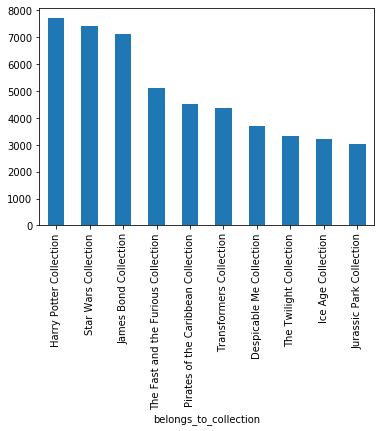

In [90]:
franchise_colln['Gross_revenue'].plot.bar();

In [84]:
plt.figure(figsize=(12,5))
sns.barplot(x='belongs_to_collection', y='Gross_revenue', data=franchise_colln)
plt.show()

ValueError: Could not interpret input 'belongs_to_collection'

<Figure size 864x360 with 0 Axes>

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,963.421250,7707.37
1160,Star Wars Collection,8,929.312500,7434.50
646,James Bond Collection,26,273.344615,7106.96
1317,The Fast and the Furious Collection,8,640.636250,5125.09
968,Pirates of the Caribbean Collection,5,904.314000,4521.57
1550,Transformers Collection,5,873.222000,4366.11
325,Despicable Me Collection,4,922.765000,3691.06
1491,The Twilight Collection,5,668.422000,3342.11
610,Ice Age Collection,5,643.342000,3216.71
666,Jurassic Park Collection,4,757.870000,3031.48


In [14]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

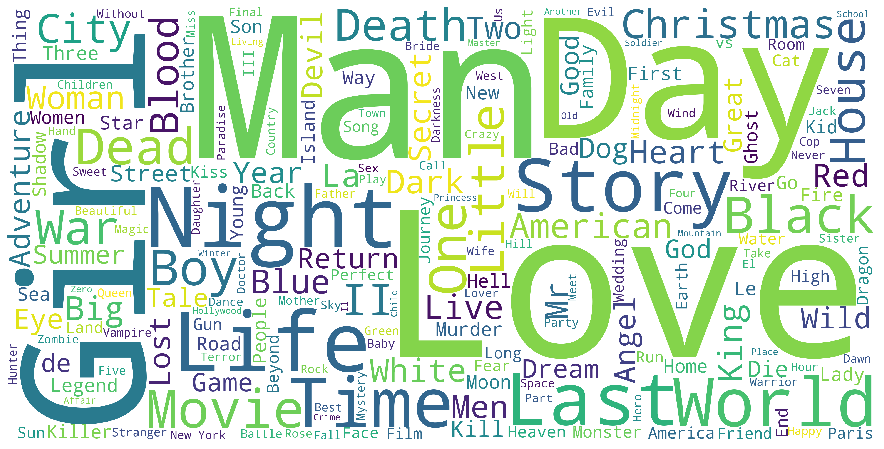

In [16]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()